# <tt>Ukraine vs Russia: Twitter sentiment analysis

<tt>Link for kaggle dataset - https://www.kaggle.com/datasets/foklacu/ukraine-war-tweets-dataset-65-days

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob #Processing textual data
from wordcloud import WordCloud #Textual data is highlighted using this
import re #find and replace characters in string
import plotly.express as px
import seaborn as sns
plt.style.use('seaborn')

C:\Users\asus\AppData\Local\Temp\ipykernel_848\1623139523.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [44]:
#Reading the database
df = pd.read_csv("C:\\Users\\asus\\Downloads\\ukrvsrusdataset\\Russia_invade.csv")

In [45]:
df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Searh
0,snscrape.modules.twitter.Tweet,https://twitter.com/pat_ianni/status/150025982...,2022-03-05 23:59:50+00:00,JOE BIDEN SAYS HOW DO WE GET TO A PLACE WHERE ...,JOE BIDEN SAYS HOW DO WE GET TO A PLACE WHERE ...,1500259827154505728,"{'_type': 'snscrape.modules.twitter.User', 'us...",14,26,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russia invade
1,snscrape.modules.twitter.Tweet,https://twitter.com/luxeprogressive/status/150...,2022-03-05 23:59:05+00:00,@ProfPaulPoast He doesn’t have to like it but ...,@ProfPaulPoast He doesn’t have to like it but ...,1500259636863246336,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,2,...,NaN,NaN,1.500259e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russia invade
2,snscrape.modules.twitter.Tweet,https://twitter.com/spielblog/status/150025947...,2022-03-05 23:58:26+00:00,@SemproniusT @RichardHanania And if NATO is th...,@SemproniusT @RichardHanania And if NATO is th...,1500259474040180738,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,NaN,1.500259e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russia invade
3,snscrape.modules.twitter.Tweet,https://twitter.com/JumboSlunce/status/1500259...,2022-03-05 23:58:20+00:00,@jakehase @Groutandgo @MysticAura_ @SkylarJord...,@jakehase @Groutandgo @MysticAura_ @SkylarJord...,1500259447742115841,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,NaN,1.500248e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russia invade
4,snscrape.modules.twitter.Tweet,https://twitter.com/ronanmcmanus/status/150025...,2022-03-05 23:58:17+00:00,@2_4_5T_2_4_D @carolecadwalla @estellecostanza...,@2_4_5T_2_4_D @carolecadwalla @estellecostanza...,1500259435142340608,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,1.500258e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russia invade


In [46]:
df.isnull().sum() #checking for null values 

_type                    0
url                      0
date                     0
content                  0
renderedContent          0
id                       0
user                     0
replyCount               0
retweetCount             0
likeCount                0
quoteCount               0
conversationId           0
lang                     0
source                   0
sourceUrl                0
sourceLabel              0
outlinks            131504
tcooutlinks         131504
media               159199
retweetedTweet      170835
quotedTweet         158743
inReplyToTweetId     76343
inReplyToUser        76343
mentionedUsers       70288
coordinates         169073
place               169073
hashtags            151809
cashtags            170163
Searh                    0
dtype: int64

In [47]:
df.shape #determining the rows and columns in the dataset

(170835, 29)

In [48]:
df.columns #the different column names

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'Searh'],
      dtype='object')

In [49]:
df.nunique()

_type                    1
url                 170835
date                163427
content             170051
renderedContent     167047
id                  170835
user                124598
replyCount             316
retweetCount           464
likeCount              980
quoteCount             175
conversationId      136718
lang                    35
source                 883
sourceUrl              763
sourceLabel            883
outlinks             28781
tcooutlinks          38473
media                11289
retweetedTweet           0
quotedTweet          10710
inReplyToTweetId     85054
inReplyToUser        55194
mentionedUsers       64950
coordinates            962
place                  952
hashtags             11167
cashtags               255
Searh                    1
dtype: int64

### Removing unnecessary columns

In [50]:
df.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'Searh'],
      dtype='object')

In [51]:
df = df.drop(['_type', 'url', 'renderedContent', 'replyCount', 
              'conversationId', 'sourceUrl', 'source', 'sourceUrl', 'media'], axis = 1)

In [52]:
df.columns

Index(['date', 'content', 'id', 'user', 'retweetCount', 'likeCount',
       'quoteCount', 'lang', 'sourceLabel', 'outlinks', 'tcooutlinks',
       'retweetedTweet', 'quotedTweet', 'inReplyToTweetId', 'inReplyToUser',
       'mentionedUsers', 'coordinates', 'place', 'hashtags', 'cashtags',
       'Searh'],
      dtype='object')

In [53]:
df = df.drop(['retweetedTweet', 'quotedTweet', 'inReplyToTweetId', 'inReplyToUser',
       'mentionedUsers', 'hashtags', 'cashtags',
       'Searh'], axis = 1)

In [54]:
#Fucntion to clean the date column
def remtime(text):
    text = text[:10]
    return text


In [55]:
df['date'] = df['date'].apply(remtime)

In [56]:
df['date']

0         2022-03-05
1         2022-03-05
2         2022-03-05
3         2022-03-05
4         2022-03-05
             ...    
170830    2021-12-31
170831    2021-12-31
170832    2021-12-31
170833    2021-12-31
170834    2021-12-31
Name: date, Length: 170835, dtype: object

# Exploratory Data Analysis

### How many tweets were made per day

In [57]:
df.date.value_counts()

2022-03-05    5000
2022-02-21    5000
2022-03-04    5000
2022-02-11    5000
2022-02-12    5000
              ... 
2022-01-05     242
2022-01-08     222
2022-01-07     204
2022-01-04     191
2022-01-01     151
Name: date, Length: 65, dtype: int64

In [58]:
#Using the groupby function to find unique dates along with the number of tweets made that day
dates = df.groupby(df.date).count()

In [59]:
dates = dates['id']

In [60]:
dates

date
2021-12-31     345
2022-01-01     151
2022-01-02     324
2022-01-03     399
2022-01-04     191
              ... 
2022-03-01    5000
2022-03-02    5000
2022-03-03    5000
2022-03-04    5000
2022-03-05    5000
Name: id, Length: 65, dtype: int64

In [78]:
#Changing the series to a dataframe and reseting index
dates = pd.DataFrame(dates).reset_index()

In [62]:
dates

,date,id
0,2021-12-31,345
1,2022-01-01,151
2,2022-01-02,324
3,2022-01-03,399
4,2022-01-04,191
...,...,...
60,2022-03-01,5000
61,2022-03-02,5000
62,2022-03-03,5000
63,2022-03-04,5000


In [63]:
dates.columns = ['id', 'date']

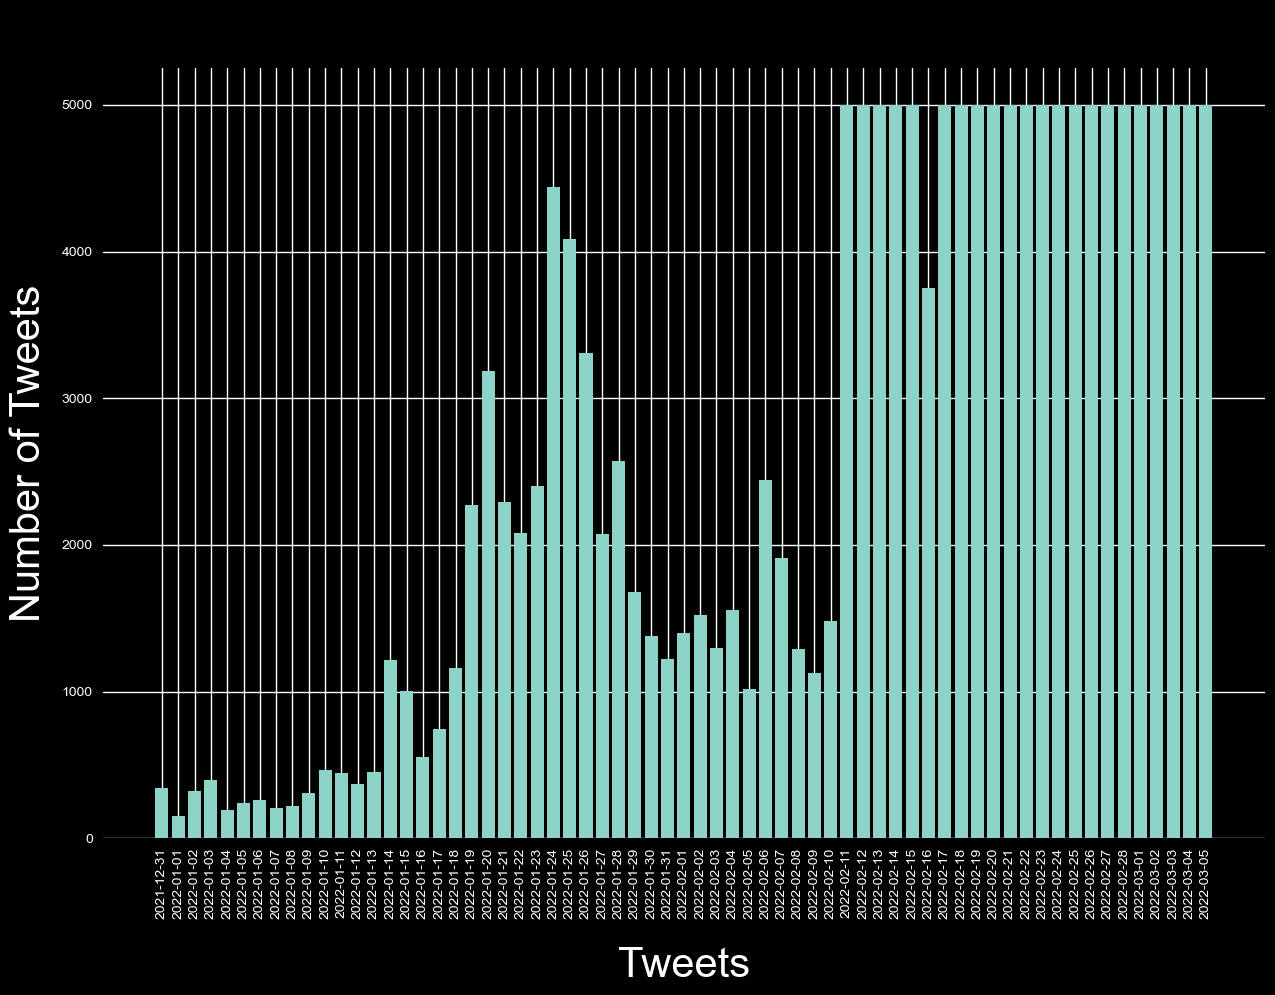

In [79]:
# For plotting the below graph
plt.figure(figsize = [15,10])
plt.bar(dates['id'], dates['date'])
plt.title('Number of tweets each day', color = 'black', size = 30, pad = 20)
plt.xlabel('Tweets', color = 'white', size = 30, labelpad = 20)
plt.ylabel('Number of Tweets', color = 'white', size = 30, labelpad = 10)
plt.xticks(rotation = 90, color = 'white')
plt.yticks(color = 'white')
plt.show()

#### Conclusion - 
i. We have data for 65 days from 31-12-2021 to 05-03-2022 <br>
ii. We can also notice a sudden spike in the number of tweets from 11th Feb' there were more than 5000 tweets been made per day and we could see the trend continue for the whole range of the date

In [65]:
beforeWar = dates[dates['id'] < '2022-02-11']

afterWar = dates[dates['id'] >= '2022-02-11']

In [66]:
beforeWar.columns

Index(['id', 'date'], dtype='object')

In [67]:
bf = beforeWar.describe().transpose()['mean']
bf[0]

1359.095238095238

In [68]:
af = afterWar.describe().transpose()['mean']
af

date    4945.782609
Name: mean, dtype: float64

In [69]:
xaxis = ['Before War Started', 'After war started']
yaxis = [bf[0], af[0]]

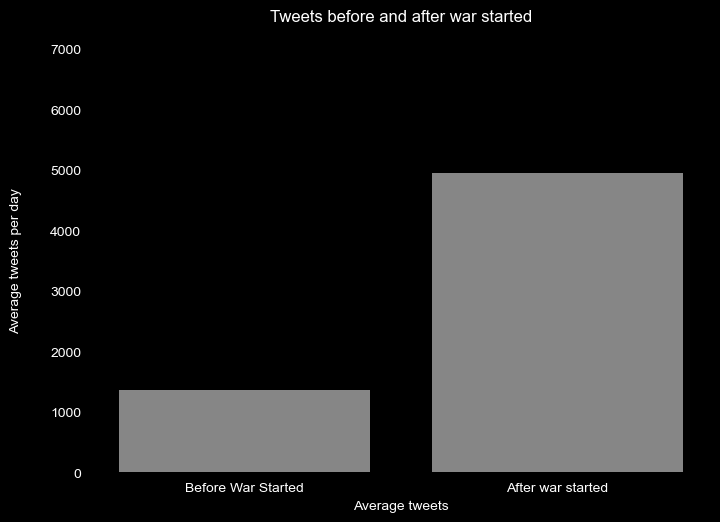

In [70]:
plt.style.use('dark_background')
plt.bar(x = xaxis, height = yaxis, color = "#868686")
plt.xlabel('Average tweets')
plt.ylabel('Average tweets per day',labelpad = 20)
plt.title('Tweets before and after war started', pad = 20)
plt.ylim(0, 7000)
plt.grid(visible = None)
plt.show()

#### From the above graph we can see there is a sudden spike in daily average tweets a week before the war started

<br>

### Which language is used the most?

In [71]:
# Getting unique values for languages along with count
# Creating a new dataframe in language
language = (df['lang'].value_counts()).reset_index()

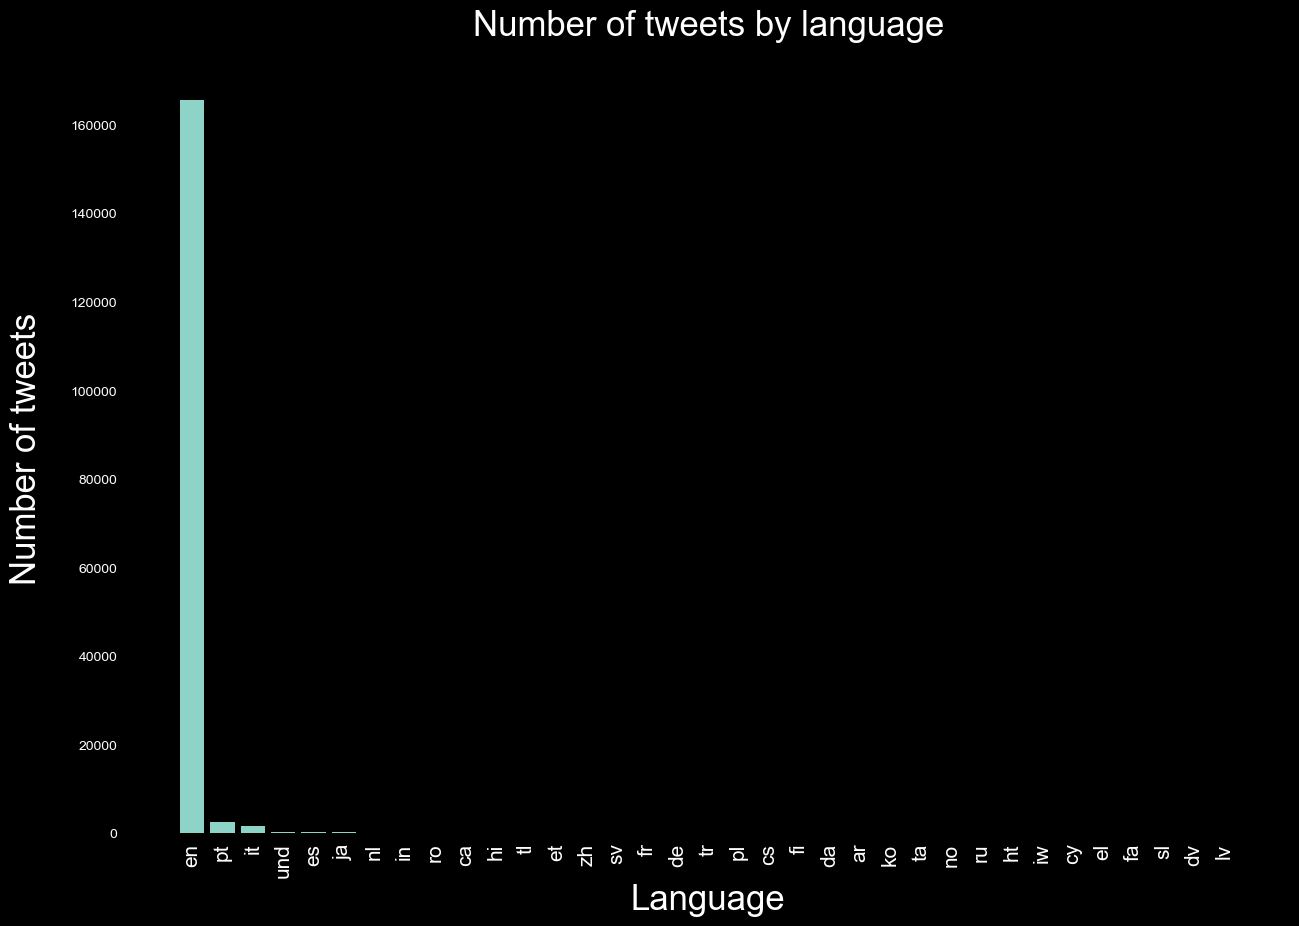

In [72]:
plt.style.use('dark_background')
plt.figure(figsize = (15,10))
plt.bar(language['index'], language['lang'])
plt.grid(visible = None)
plt.xticks(rotation = 90, size = 15)
plt.xlabel('Language', size = 25)
plt.ylabel('Number of tweets', size = 25, labelpad = 20)
plt.title('Number of tweets by language', size = 25, pad = 20)

plt.show()

#### Conclusion -  Thus it can be seen from the graph that the most commonly used language for the tweets is English

### Like & Retweet count

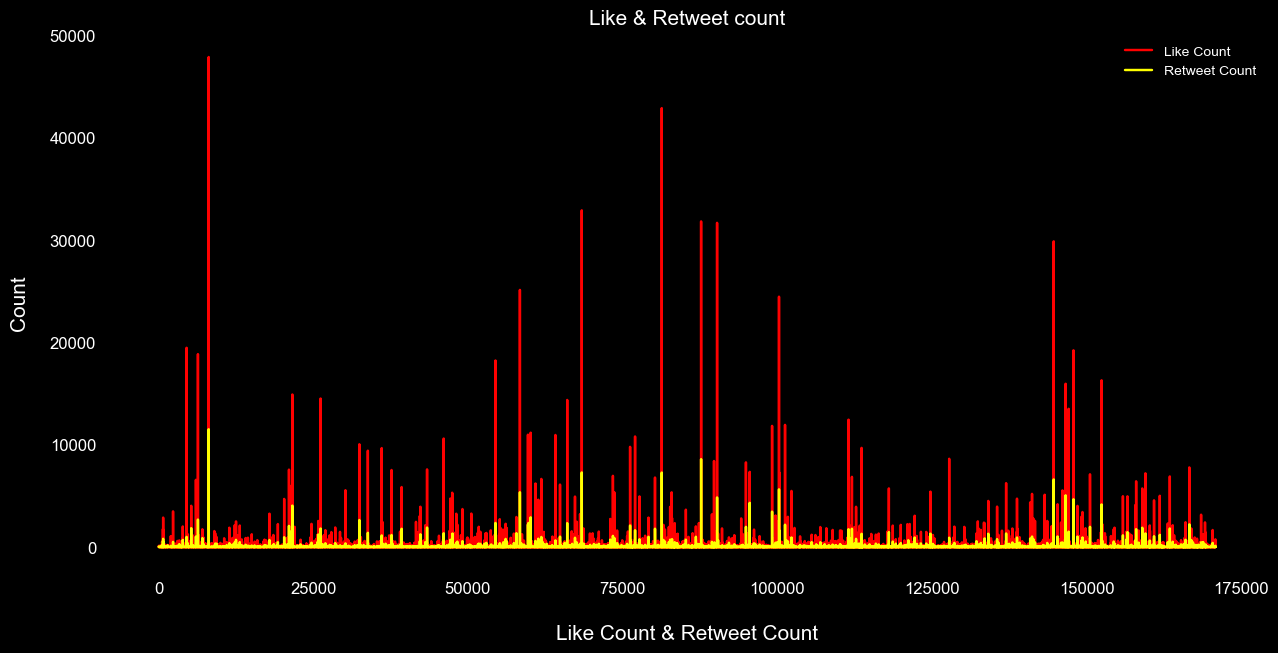

In [73]:
plt.style.use('dark_background')
plt.figure(figsize = (15,7))
plt.plot(df['likeCount'], c = 'red', label = 'Like Count')
plt.plot(df['retweetCount'], c = 'yellow', label = 'Retweet Count')
plt.xlabel('Like Count & Retweet Count', labelpad = 20, size =15)
plt.ylabel('Count', labelpad = 15, size = 15)
plt.title('Like & Retweet count', size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.legend()
plt.grid(visible = None)
plt.show()

#### It can be seen from the above graph that there is a relation between the like and the retweet count <br>The retweet count spikes with a lower intensity with the spike in like count

### Number of tweets per user (Top 50)

In [74]:
# The user column has values stored in a dictionary format
df['user']

0         {'_type': 'snscrape.modules.twitter.User', 'us...
1         {'_type': 'snscrape.modules.twitter.User', 'us...
2         {'_type': 'snscrape.modules.twitter.User', 'us...
3         {'_type': 'snscrape.modules.twitter.User', 'us...
4         {'_type': 'snscrape.modules.twitter.User', 'us...
                                ...                        
170830    {'_type': 'snscrape.modules.twitter.User', 'us...
170831    {'_type': 'snscrape.modules.twitter.User', 'us...
170832    {'_type': 'snscrape.modules.twitter.User', 'us...
170833    {'_type': 'snscrape.modules.twitter.User', 'us...
170834    {'_type': 'snscrape.modules.twitter.User', 'us...
Name: user, Length: 170835, dtype: object

In [75]:
df['user'][0]

'{\'_type\': \'snscrape.modules.twitter.User\', \'username\': \'pat_ianni\', \'id\': 1419111323707711489, \'displayname\': \'Conspiracy_Realist84\', \'description\': "🇦🇺🇮🇹Have a bad sense of humor,I\'m a truth seeker.\\nwill not stand for government tyranny.", \'rawDescription\': "🇦🇺🇮🇹Have a bad sense of humor,I\'m a truth seeker.\\nwill not stand for government tyranny.", \'descriptionUrls\': None, \'verified\': False, \'created\': \'2021-07-25T01:45:03+00:00\', \'followersCount\': 2941, \'friendsCount\': 2018, \'statusesCount\': 4649, \'favouritesCount\': 8813, \'listedCount\': 0, \'mediaCount\': 983, \'location\': \'Melbourne, Victoria\', \'protected\': False, \'linkUrl\': None, \'linkTcourl\': None, \'profileImageUrl\': \'https://pbs.twimg.com/profile_images/1475645927691980800/HG1Kd42Z_normal.jpg\', \'profileBannerUrl\': \'https://pbs.twimg.com/profile_banners/1419111323707711489/1627177899\', \'label\': None, \'url\': \'https://twitter.com/pat_ianni\'}'

In [81]:
# Using the eval function to convert it to a dictionary
eval(df['user'][0])

{'_type': 'snscrape.modules.twitter.User',
 'username': 'pat_ianni',
 'id': 1419111323707711489,
 'displayname': 'Conspiracy_Realist84',
 'description': "🇦🇺🇮🇹Have a bad sense of humor,I'm a truth seeker.\nwill not stand for government tyranny.",
 'rawDescription': "🇦🇺🇮🇹Have a bad sense of humor,I'm a truth seeker.\nwill not stand for government tyranny.",
 'descriptionUrls': None,
 'verified': False,
 'created': '2021-07-25T01:45:03+00:00',
 'followersCount': 2941,
 'friendsCount': 2018,
 'statusesCount': 4649,
 'favouritesCount': 8813,
 'listedCount': 0,
 'mediaCount': 983,
 'location': 'Melbourne, Victoria',
 'protected': False,
 'linkUrl': None,
 'linkTcourl': None,
 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1475645927691980800/HG1Kd42Z_normal.jpg',
 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1419111323707711489/1627177899',
 'label': None,
 'url': 'https://twitter.com/pat_ianni'}

In [84]:
# Extracting the required value from the dictionary
eval(df['user'][0])['username']

'pat_ianni'

In [85]:
# Using the eval funtion on whole column
df['user'] = df['user'].apply(eval)

In [86]:
# function to extract username for each dict
def username(text):
    return text['username']

In [87]:
df['username'] = df['user'].apply(username)

In [88]:
df['username'].value_counts()

AndyVermaut        153
PoliticalGeeker    115
BistoshW            92
MarketsCafe         78
aw_journal2021      72
                  ... 
pressyprice          1
jkellymcgowan        1
Josh45939471         1
aztwizzler           1
CZCBZ                1
Name: username, Length: 114763, dtype: int64

In [89]:
df.shape

(170835, 14)

In [90]:
users = (pd.DataFrame(df['username'].value_counts().head(50))).reset_index()
users

,index,username
0,AndyVermaut,153
1,PoliticalGeeker,115
2,BistoshW,92
3,MarketsCafe,78
4,aw_journal2021,72
5,owhy3,70
6,riverotter1968,65
7,SkyNetPlatform,63
8,EuropeNews_b,63
9,DHFabian1,60


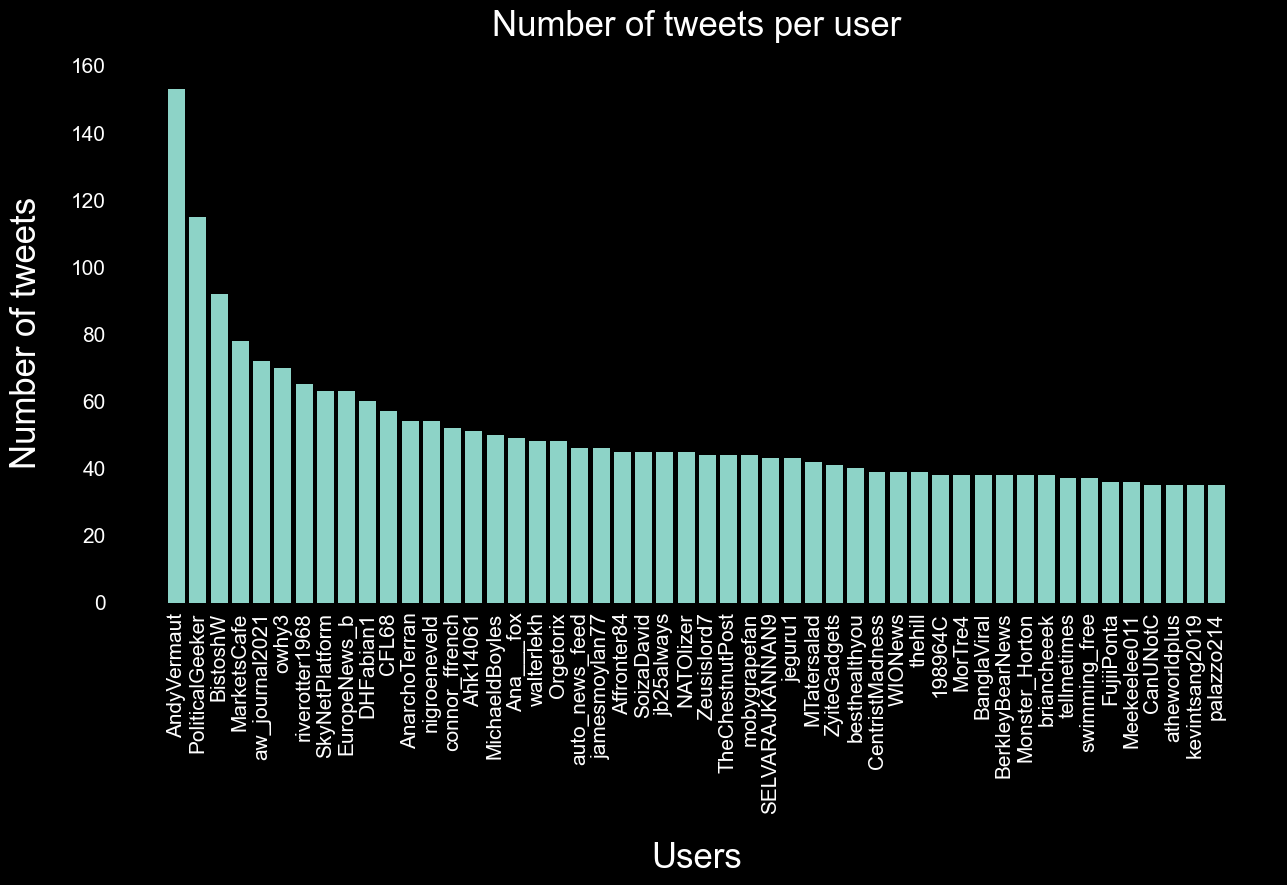

In [91]:
plt.figure(figsize = (15,7))
plt.bar(users['index'], users['username'])
plt.grid(visible = None)
plt.xlabel('Users', size = 25, labelpad = 20)
plt.ylabel('Number of tweets', size = 25, labelpad = 20)
plt.title('Number of tweets per user', size = 25, pad = 20)
plt.xticks(rotation = 90, size = 15)
plt.yticks(size = 15)
plt.show()

##### The user with the most tweets are <u>AndyVermaut</u>, <u>PoliticalGeeker</u>, <u>BistoshW</u> respectively.

<br>

### Number of tweets by country

In [92]:
df['place']

0                                                       NaN
1                                                       NaN
2                                                       NaN
3                                                       NaN
4                                                       NaN
                                ...                        
170830    {'_type': 'snscrape.modules.twitter.Place', 'f...
170831                                                  NaN
170832                                                  NaN
170833                                                  NaN
170834                                                  NaN
Name: place, Length: 170835, dtype: object

In [93]:
# Creating a new dataframe with tweets and location
country = df[['content', 'place']]

In [95]:
# Removing the null values
country.dropna(inplace = True)

C:\Users\asus\AppData\Local\Temp\ipykernel_848\3335076558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country.dropna(inplace = True)


In [96]:
country.shape

(1762, 2)

In [97]:
# Converting to dictionary
country['place'] = country['place'].apply(eval)

C:\Users\asus\AppData\Local\Temp\ipykernel_848\2775644953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country['place'] = country['place'].apply(eval)


In [98]:
# Functions to extract required data dictionary
def city(text):
    return text['name']

def countryRe(text):
    return text['country']

def getCountryCode(text):
    return text['countryCode']


In [99]:
# Using those functions
country['City'] = country['place'].apply(city)
country['Country'] = country['place'].apply(countryRe)
country['countrycode'] = country['place'].apply(getCountryCode)

C:\Users\asus\AppData\Local\Temp\ipykernel_848\3573477952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country['City'] = country['place'].apply(city)
C:\Users\asus\AppData\Local\Temp\ipykernel_848\3573477952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country['Country'] = country['place'].apply(countryRe)
C:\Users\asus\AppData\Local\Temp\ipykernel_848\3573477952.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [100]:
country

,content,place,City,Country,countrycode
16,This is how the #USA and #Britain invade a cou...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",Hamburg,Germany,DE
114,@Woj_Pawelczyk Putin decided to invade Russia ...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",Buckeye,United States,US
244,@arj98207 @disclosetv Why does Russia want to ...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",Haxey,United Kingdom,GB
249,It was wrong for Putin to invade Ukraine out o...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",Highland,United States,US
311,@jdmarrs @anders_aslund Russia had already thr...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",San Pedro,Republic of the Philippines,PH
...,...,...,...,...,...
170524,@thehill Imagine Russia posting his Army on US...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",Doncaster,United Kingdom,GB
170548,Wonder if Russia will invade Ukraine Saturday...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",Bath,United Kingdom,GB
170553,@DiretoFront Biden não manda mais nada nos EUA...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",Natal,Brazil,BR
170788,Is Russia preparing to invade Ukraine? And oth...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",Chapeltown,United Kingdom,GB


In [101]:
country['City'].value_counts()

Los Angeles    32
Florida        31
Washington     29
Ukraine        22
Manhattan      20
               ..
Broomfield      1
Panama          1
East            1
Poole           1
Natal           1
Name: City, Length: 930, dtype: int64

In [102]:
country['Country'].value_counts()

United States     818
United Kingdom    299
Canada             71
Brazil             70
India              50
                 ... 
Denmark             1
Vietnam             1
Zimbabwe            1
Paraguay            1
Azerbaijan          1
Name: Country, Length: 86, dtype: int64

In [103]:
# Removing the place column as it is not needed anymore, has dict values
country.drop(['place'], axis = 1, inplace = True)

C:\Users\asus\AppData\Local\Temp\ipykernel_848\2357462256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country.drop(['place'], axis = 1, inplace = True)


In [104]:
# Using groupby to create a new dataframe with unique countries and corresponding values
cityGraph = country.groupby(country['Country']).count()

In [105]:
cityGraph.reset_index(inplace = True)
cityGraph

,Country,content,City,countrycode
0,Albania,1,1,1
1,Algeria,1,1,1
2,Anguilla,1,1,1
3,Argentina,2,2,2
4,Australia,31,31,31
...,...,...,...,...
81,United Kingdom,299,299,299
82,United States,818,818,818
83,Vietnam,1,1,1
84,Zambia,1,1,1


<br>

# <u>Final Conclusion

In [83]:
# Grouping by sentiments to find total positive, negative and neutral sentiments
a = (df['Sentiment']).value_counts()
a

Positive    66205
Neutral     58685
Negative    45945
Name: Sentiment, dtype: int64

In [84]:
a = (pd.DataFrame(a)).reset_index()

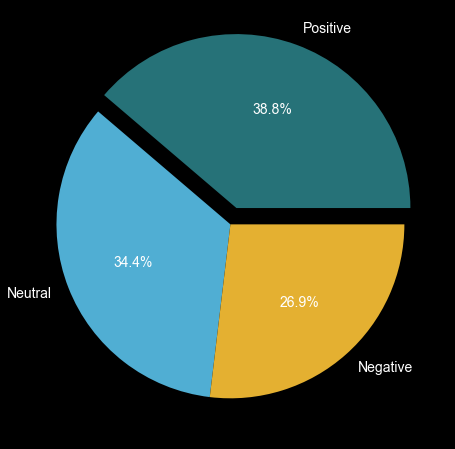

In [85]:
plt.figure(figsize = (8,8))
plt.pie(a['Sentiment'], labels = a['index'], autopct = '%1.1f%%', explode = [0.1, 0, 0],
        colors = ['#267278', '#50AED3', '#E4B031'], textprops={'fontsize': 14})
plt.show()

### - Here we can see that even though most of the opinions were positive(38.8%) there isnt much of a difference between the positive negative and the neutral opinions of the people on this matter making it safe to say that people had mixed opinions about this war

<br>